C:\Users\Desktop\AppData\Local\Temp\ipykernel_9132\3798891203.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


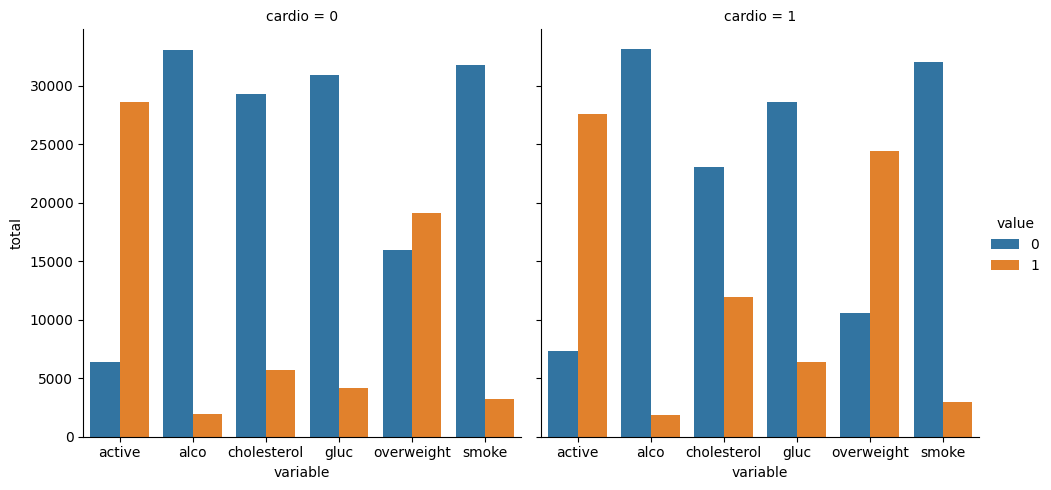

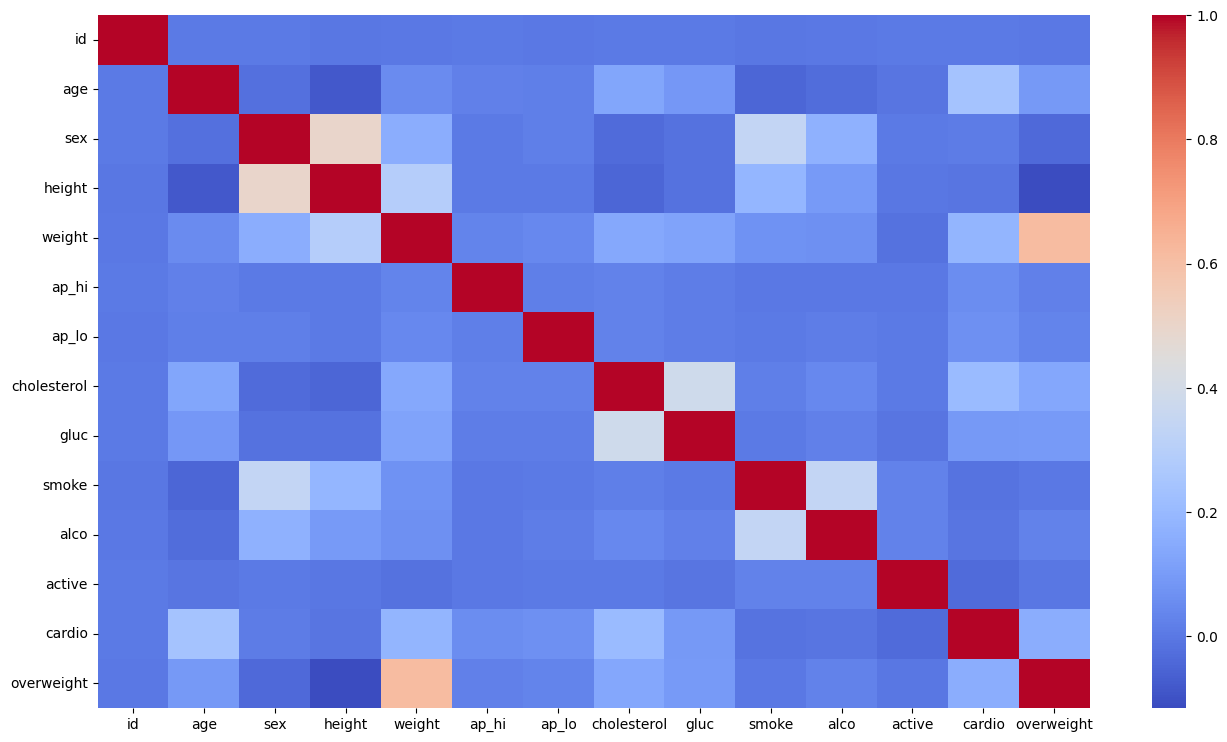

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv("medical_examination.csv")

# 2 dividing their weight in kilograms by the square of their height in meters
df['overweight'] = (df['weight']/(df['height']*df['height']/10000) >25).astype(int)

# 3 Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1
df['cholesterol'] = np.where(df['cholesterol'] <= 1, 0, 1)
df['gluc'] = np.where(df['gluc'] <= 1, 0, 1)

# 4 Draw the Categorical Plot in the draw_cat_plot function
# ? NOTA: o pd.melt serve para transformar o df em um formato longo, isso significa que as variáveis ficam em colunas e as contagens de cada categoria ficam em linhas, agrupadas pela lista de variáveis (id_vars)
# ? e as contagens de cada categoria ficam em colunas (value_vars). Isso serve para agrupar as variáveis em categorias e mostrar a contagem de cada categoria.
df_cat = pd.melt(df, id_vars="cardio", value_vars=[
                     "active", "alco", "cholesterol", "gluc", "overweight", "smoke"])

# 6 Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
#?Nota: Nesse caso, primeiro usamos o melt para criar o agrupamento de variaveis, para depois usar o groupby por variavel/value
df_cat = df_cat.groupby(
    ['cardio', 'variable', 'value']).size().reset_index()
df_cat = df_cat.rename(columns={0: 'total'})

chart = sns.catplot(data=df_cat, x="variable",
                        y="total", hue="value", kind="bar",col="cardio")


# 11 Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
    # height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # height is more than the 97.5th percentile
    # weight is less than the 2.5th percentile
    # weight is more than the 97.5th percentile
df['height'] >= df['height'].quantile(0.025)
df['height'] <= df['height'].quantile(0.975)
df['weight'] >= df['weight'].quantile(0.025)
df['weight'] <= df['weight'].quantile(0.975)
df_heat = df

# 12 Calculate the correlation matrix and store it in the corr variable
corr = df_heat.corr()

# 13 Generate a mask for the upper triangle and store it in the mask variable
mask = np.triu_indices_from(np.ones_like(corr))

# 14 Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9))

# 15 Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()

sns.heatmap(corr, cmap = 'coolwarm')

df_cat.head()       